In [1]:
# Insert the plots into the notebook
%matplotlib inline

In [8]:
from __future__ import division
import datetime
import zipfile
import cPickle as pickle
import itertools
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import multiprocessing
import seaborn  # Makes the default style of the plots nicer

In [9]:
import warnings
warnings.simplefilter('ignore')

In [10]:
from fatiando.vis import mpl
from fatiando.gravmag import tesseroid
from fatiando import gridder, utils
from fatiando.inversion import Smoothness2D
import fatiando

In [11]:
print("Version of Fatiando a Terra used: {}".format(fatiando.__version__))

Version of Fatiando a Terra used: 0.5


In [12]:
from datasets import fetch_assumpcao_moho_points
from mohoinv import (MohoGravityInvSpherical, TesseroidRelief, make_mesh,
                     split_data, score_test_set, score_seismic_constraints, 
                     score_all, fit_all, predict_seismic)

In [7]:
ncpu = multiprocessing.cpu_count()
print("Number of cores: {}".format(ncpu))

Number of cores: 8


In [13]:
with open('../data/processed-data-malawi.txt') as f:
    for i in range(3):  # Skip the first 2 header lines
        line = f.readline()
    full_shape = [int(x) for x in line.split()[1:]]
    full_lat, full_lon, full_height, full_grav = np.loadtxt(f, usecols=[0, 1, 2, -1], 
                                                            unpack=True)
    full_data = [full_lat, full_lon, full_height, full_grav]
print('Number of data points in lat and lon: {}'.format(full_shape))

Number of data points in lat and lon: [5, 3]


In [14]:
full_area = (full_lat.min(), full_lat.max(), full_lon.min(), full_lon.max())
bm = Basemap(projection='cyl', 
             llcrnrlon=full_area[2], urcrnrlon=full_area[3], 
             llcrnrlat=full_area[0], urcrnrlat=full_area[1],
             resolution='l')

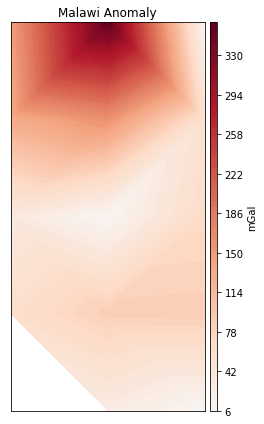

In [16]:
x, y = bm(full_lon, full_lat)
ranges = np.abs([full_grav.min(), full_grav.max()]).max()

plt.figure(figsize=(7, 6))
plt.title('Malawi Anomaly')
bm.contourf(x, y, full_grav, 60, tri=True, cmap='RdBu_r', vmin=-ranges, vmax=ranges)
plt.colorbar(pad=0.01, aspect=50).set_label('mGal')
bm.drawmeridians(np.arange(-80, -30, 10), labels=[0, 0, 0, 1], linewidth=0.2)
bm.drawparallels(np.arange(-50, 30, 15), labels=[1, 0, 0, 0], linewidth=0.2)
plt.tight_layout()